### Stock Market Prediction And Forecasting Using Stacked LSTM|

In [95]:
### Keras and Tensorflow >2.0

import numpy as np
import pandas as pd

In [96]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [98]:
### Data Collection

import pandas_datareader.data as pdr
#pip install yfinance
import yfinance as yf
yf.pdr_override()

In [99]:
start='2010-01-01'
end= '2023-03-31'

df = pdr.get_data_yahoo('AAPL',start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


In [100]:
df1=df.reset_index()['Close']

In [101]:
data= df.filter(['Close'])
data

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2023-03-24,160.250000
2023-03-27,158.279999
2023-03-28,157.649994


In [102]:
df1

0         7.643214
1         7.656429
2         7.534643
3         7.520714
4         7.570714
           ...    
3328    160.250000
3329    158.279999
3330    157.649994
3331    160.770004
3332    162.360001
Name: Close, Length: 3333, dtype: float64

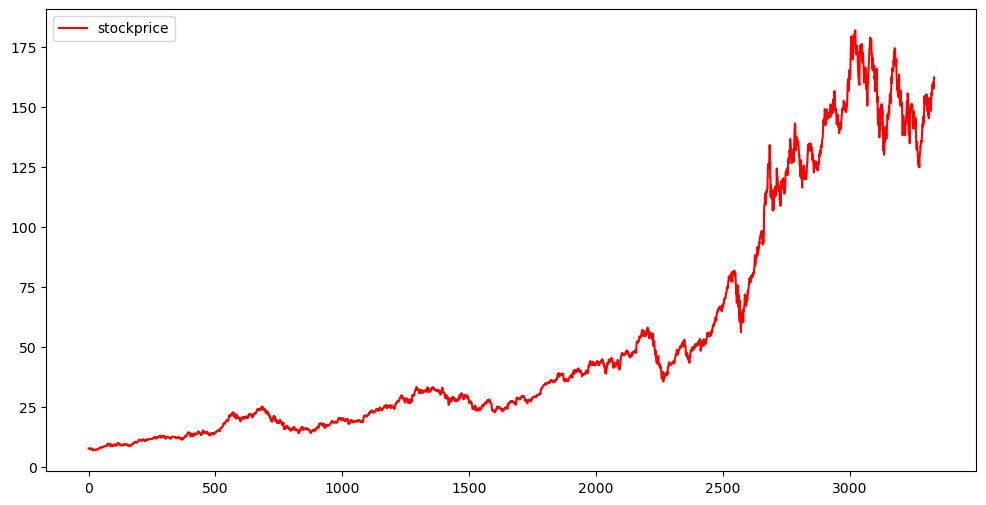

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df1,'r',label='stockprice')
plt.legend()
plt.show()

In [104]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [105]:
df1

0         7.643214
1         7.656429
2         7.534643
3         7.520714
4         7.570714
           ...    
3328    160.250000
3329    158.279999
3330    157.649994
3331    160.770004
3332    162.360001
Name: Close, Length: 3333, dtype: float64

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [107]:
print(df1)

[[0.00447776]
 [0.00455321]
 [0.00385789]
 ...
 [0.86092005]
 [0.87873331]
 [0.88781117]]


In [108]:
int(len(df1)*0.65)

2166

In [109]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [110]:
training_size,test_size

(2166, 1167)

In [111]:
train_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.25645617],
       [0.25665599],
       [0.25898256]])

In [112]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [113]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [114]:
X_test

array([[0.25705565, 0.25896828, 0.26022434, ..., 0.18598843, 0.18624534,
        0.1637933 ],
       [0.25896828, 0.26022434, 0.26092375, ..., 0.18624534, 0.1637933 ,
        0.17245724],
       [0.26022434, 0.26092375, 0.26531995, ..., 0.1637933 , 0.17245724,
        0.17198622],
       ...,
       [0.83631274, 0.82095455, 0.78886799, ..., 0.86194778, 0.86822802,
        0.87576442],
       [0.82095455, 0.78886799, 0.75375548, ..., 0.86822802, 0.87576442,
        0.86451698],
       [0.78886799, 0.75375548, 0.7509008 , ..., 0.87576442, 0.86451698,
        0.86092005]])

In [115]:
print(X_train.shape), print(y_train.shape)

(2065, 100)
(2065,)


(None, None)

In [116]:
print(X_test.shape), print(ytest.shape)

(1066, 100)
(1066,)


(None, None)

In [117]:
len(ytest)

1066

In [118]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [119]:
X_test

array([[[0.25705565],
        [0.25896828],
        [0.26022434],
        ...,
        [0.18598843],
        [0.18624534],
        [0.1637933 ]],

       [[0.25896828],
        [0.26022434],
        [0.26092375],
        ...,
        [0.18624534],
        [0.1637933 ],
        [0.17245724]],

       [[0.26022434],
        [0.26092375],
        [0.26531995],
        ...,
        [0.1637933 ],
        [0.17245724],
        [0.17198622]],

       ...,

       [[0.83631274],
        [0.82095455],
        [0.78886799],
        ...,
        [0.86194778],
        [0.86822802],
        [0.87576442]],

       [[0.82095455],
        [0.78886799],
        [0.75375548],
        ...,
        [0.86822802],
        [0.87576442],
        [0.86451698]],

       [[0.78886799],
        [0.75375548],
        [0.7509008 ],
        ...,
        [0.87576442],
        [0.86451698],
        [0.86092005]]])

In [120]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [121]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [122]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#compilig
model.compile(loss='mean_squared_error',optimizer='adam')

#trai model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1,batch_size=1)

2023-04-19 10:03:14.295270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 10:03:14.297550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 10:03:14.299081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2065/2065 [==============================] - ETA: 0s - loss: 1.2662e-04

2023-04-19 10:05:03.754314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 10:05:03.756364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 10:05:03.757902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2065/2065 [==============================] - 127s 60ms/step - loss: 1.2662e-04 - val_loss: 7.4264e-04


In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [124]:
import tensorflow as tf

In [125]:
tf.__version__

'2.12.0'

In [143]:
### Lets Do the prediction and check performance metrics
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)

65/65 [==============================] - 4s 57ms/step


In [144]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
len(test_predict)

1066

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(np.mean(((test_predict-ytest)**2)))
rmse

117.10603414531276

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

117.0190490989549

/tmp/ipykernel_84/1671767707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']= test_predict


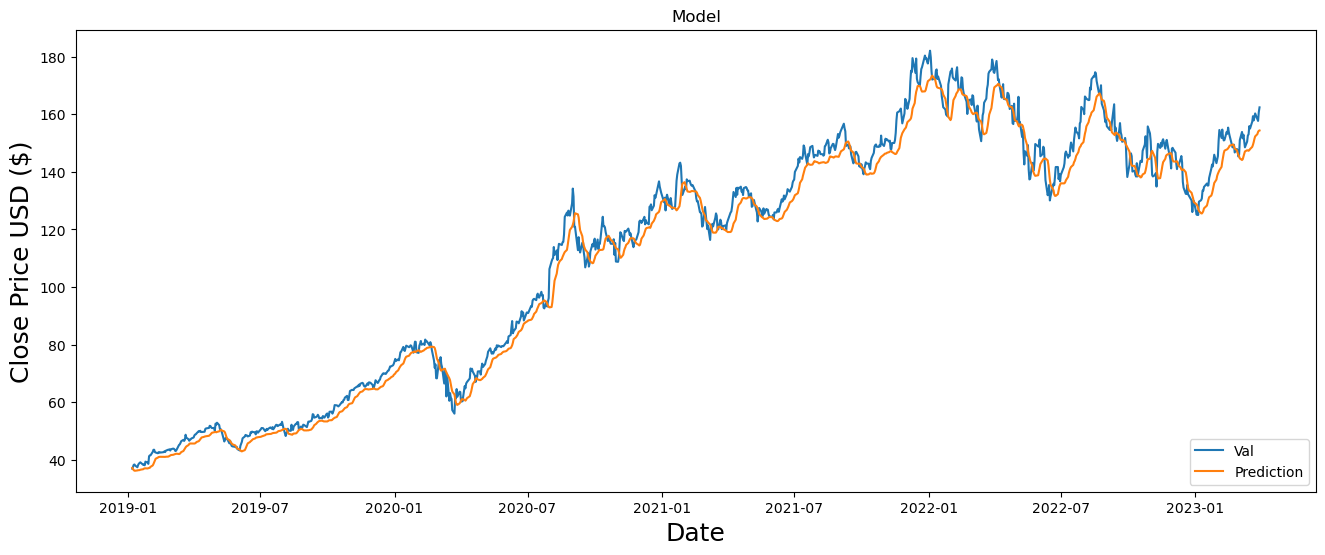

In [157]:
train= data[:training_size]
valid= data[(training_size+100+1):]

valid['Prediction']= test_predict

#visualize

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend([ 'Val', 'Prediction'], loc='lower right')
plt.show()

In [158]:
valid[['Prediction','Close']]

,Prediction,Close
Date,,
2019-01-07,37.241734,36.982498
2019-01-08,36.850361,37.687500
2019-01-09,36.497086,38.327499
2019-01-10,36.299408,38.450001
2019-01-11,36.286545,38.072498
...,...,...
2023-03-24,152.285751,160.250000
2023-03-27,153.053619,158.279999
2023-03-28,153.837891,157.649994


In [159]:
"""
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#testPredictPlot['Close']= data['Close']
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1),'r',label='original')
plt.plot(trainPredictPlot,'b',label='train data')
plt.plot(testPredictPlot,'g',label= 'test data')

plt.legend()
plt.show() """

"\n### Plotting \n# shift train predictions for plotting\nlook_back=100\ntrainPredictPlot = numpy.empty_like(df1)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict\n# shift test predictions for plotting\ntestPredictPlot = numpy.empty_like(df1)\ntestPredictPlot[:, :] = numpy.nan\ntestPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict\n#testPredictPlot['Close']= data['Close']\n# plot baseline and predictions\nplt.figure(figsize=(12,6))\nplt.plot(scaler.inverse_transform(df1),'r',label='original')\nplt.plot(trainPredictPlot,'b',label='train data')\nplt.plot(testPredictPlot,'g',label= 'test data')\n\nplt.legend()\nplt.show() "

In [160]:
model.save('my_model.h5') 

In [78]:
len(test_data)

1167

In [79]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 826)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
temp_input

[0.3601238067004902,
 0.3605234599637148,
 0.3596956223323706,
 0.36620428608142147,
 0.3665896520127291,
 0.3746398666048881,
 0.3744828366306184,
 0.37693786197869467,
 0.3799781016691603,
 0.38954129244059366,
 0.3853734425021613,
 0.38875622968712265,
 0.3867437195980217,
 0.3935949308415682,
 0.402786999454672,
 0.40378611083326404,
 0.41324937739915657,
 0.40714036691333033,
 0.4052277374708314,
 0.4107943520510803,
 0.41577579584787866,
 0.41269273772060105,
 0.41430563810541626,
 0.41648946550070387,
 0.4151762941735724,
 0.40181641918097505,
 0.4142913507734993,
 0.4237831484442869,
 0.42311229722827365,
 0.40261572570742415,
 0.40140247858583356,
 0.4159470695951265,
 0.41965816050160537,
 0.4250249266707726,
 0.41763131952164867,
 0.4198008595850194,
 0.41703181784734245,
 0.42786536150909527,
 0.42453963653392407,
 0.42465384807138185,
 0.4161611617791863,
 0.42275546240186107,
 0.41801668545295634,
 0.40766847548699076,
 0.38644394698139917,
 0.37202781128254214,
 0.378550

In [82]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=825
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.36052346 0.35969562 0.36620429 0.36658965 0.37463987 0.37448284
 0.37693786 0.3799781  0.38954129 0.38537344 0.38875623 0.38674372
 0.39359493 0.402787   0.40378611 0.41324938 0.40714037 0.40522774
 0.41079435 0.4157758  0.41269274 0.41430564 0.41648947 0.41517629
 0.40181642 0.41429135 0.42378315 0.4231123  0.40261573 0.40140248
 0.41594707 0.41965816 0.42502493 0.41763132 0.41980086 0.41703182
 0.42786536 0.42453964 0.42465385 0.41616116 0.42275546 0.41801669
 0.40766848 0.38644395 0.37202781 0.37855076 0.35124575 0.35101737
 0.38734318 0.37379774 0.39295261 0.37893617 0.3733838  0.34075485
 0.36811692 0.35397198 0.31514835 0.35759743 0.30655579 0.32175694
 0.31292171 0.31022404 0.28804319 0.28109204 0.31322146 0.31128028
 0.3297215  0.31444897 0.32454025 0.32379803 0.30470024 0.31043813
 0.30541391 0.33547367 0.33113455 0.3406121  0.34335257 0.35086039
 0.37055765 0.36681803 0.37004383 0.36449146 0.35611299 0.34389497
 0.35492831 0.35340105 0.36473413 0.36501961 0.358

2023-04-19 09:47:21.625743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 09:47:21.628051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 09:47:21.629453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

0 day output [[0.85301226]]
1 day input [0.35969562 0.36620429 0.36658965 0.37463987 0.37448284 0.37693786
 0.3799781  0.38954129 0.38537344 0.38875623 0.38674372 0.39359493
 0.402787   0.40378611 0.41324938 0.40714037 0.40522774 0.41079435
 0.4157758  0.41269274 0.41430564 0.41648947 0.41517629 0.40181642
 0.41429135 0.42378315 0.4231123  0.40261573 0.40140248 0.41594707
 0.41965816 0.42502493 0.41763132 0.41980086 0.41703182 0.42786536
 0.42453964 0.42465385 0.41616116 0.42275546 0.41801669 0.40766848
 0.38644395 0.37202781 0.37855076 0.35124575 0.35101737 0.38734318
 0.37379774 0.39295261 0.37893617 0.3733838  0.34075485 0.36811692
 0.35397198 0.31514835 0.35759743 0.30655579 0.32175694 0.31292171
 0.31022404 0.28804319 0.28109204 0.31322146 0.31128028 0.3297215
 0.31444897 0.32454025 0.32379803 0.30470024 0.31043813 0.30541391
 0.33547367 0.33113455 0.3406121  0.34335257 0.35086039 0.37055765
 0.36681803 0.37004383 0.36449146 0.35611299 0.34389497 0.35492831
 0.35340105 0.36473413 

In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [84]:
import matplotlib.pyplot as plt

In [85]:
len(df1)

3333

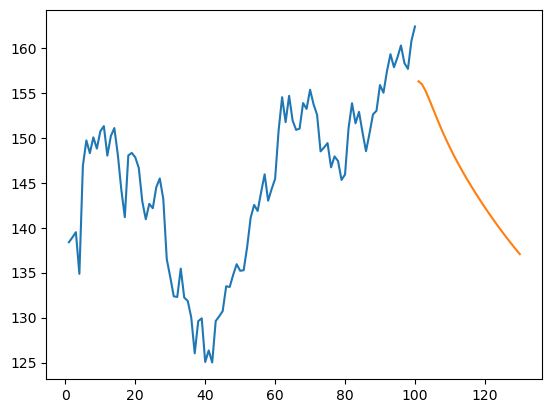

In [94]:
plt.plot(day_new,scaler.inverse_transform(df1[3233:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

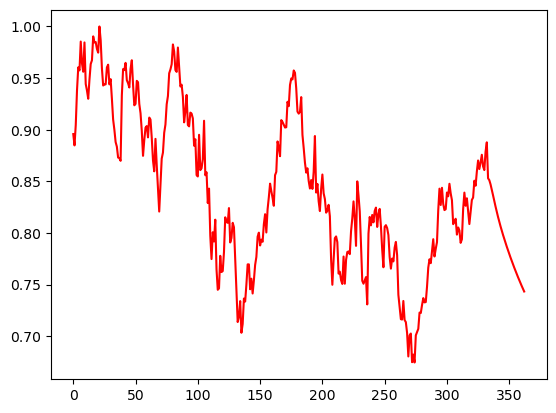

In [92]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3000:],'r')

In [62]:
df3=scaler.inverse_transform(df3).tolist()

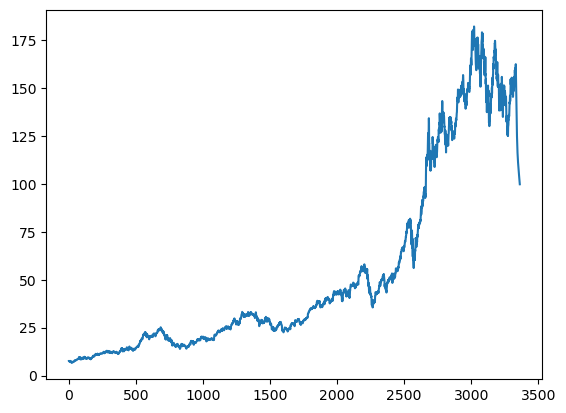

In [63]:
plt.plot(df3)